In [92]:
import pandas as pd
import numpy as np
import sympy as sp
from scipy.stats import norm, t


data_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

# Facebook

In [48]:
facebook_df = pd.read_excel(data_path + "Hours spent on Facebook.xlsx")
facebook_df.head()

,Customer,Hours spent on Facebook on Mobile
0,1,4.092475
1,2,7.233371
2,3,7.455792
3,4,7.253503
4,5,2.249682


In [49]:
facebook_mean = facebook_df["Hours spent on Facebook on Mobile"].mean()
facebook_sigma = facebook_df["Hours spent on Facebook on Mobile"].std()
facebook_n = len(facebook_df)


print("Mean : {} | Standard Deviation : {} | Sample size : {}".format(facebook_mean, facebook_sigma, facebook_n))

Mean : 4.847316438536623 | Standard Deviation : 2.9789129198018 | Sample size : 102


Margin of error : 0.5781037854355929
Confidence intervalle (95%) : [4.269212653101031, 5.425420223972216]


<Axes: >

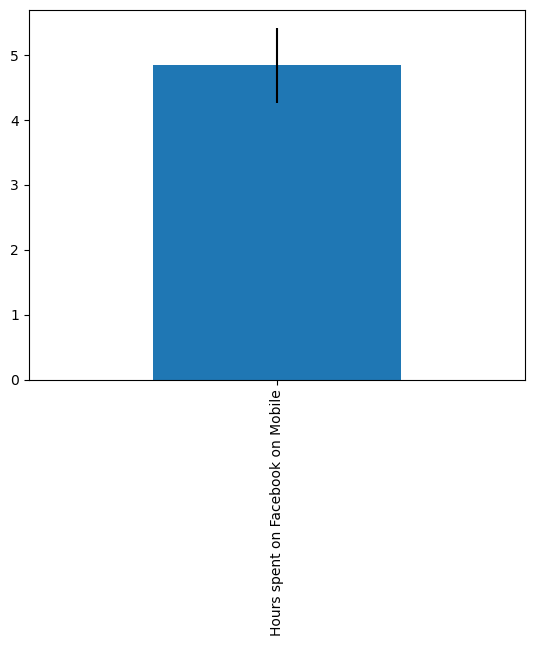

In [65]:
# E = t * sigma / sqrt(n)
# -> t = t_value
# -> sigma = standard deviation
# -> n = sample size

# Normal distribution because n > 30-40
# 95% confidence interval
# -> p-value = alpha = 0,05
# -> t_value = 1.96 

# Using scipy library
facebook_alpha = 0.05
facebook_t_value = norm.ppf(1 - facebook_alpha / 2)

facebook_E = facebook_t_value * facebook_sigma / np.sqrt(facebook_n)

facebook_min_ci = facebook_mean - facebook_E
facebook_max_ci = facebook_mean + facebook_E

print("Margin of error : {}".format(facebook_E))
print("Confidence intervalle (95%) : [{}, {}]".format(facebook_min_ci, facebook_max_ci))

# iloc to only use the column that we want to calculate the mean and confidence interval
facebook_df.iloc[:,1:].mean().plot(yerr=facebook_E, kind="bar")

<Axes: >

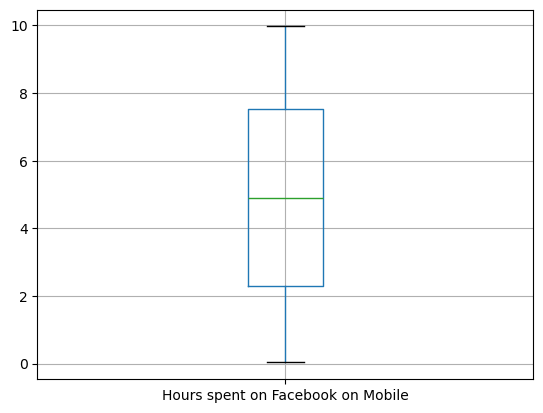

In [33]:
facebook_df.boxplot(column=["Hours spent on Facebook on Mobile"])

# Google

In [22]:
google_df = pd.read_excel(data_path + "Monthly spending on adwords.xlsx")
google_df.head()

,Monthly spending
0,562.460391
1,382.543660
2,947.684175
3,425.084351
4,546.562302


In [30]:
google_mean = google_df["Monthly spending"].mean()
google_sigma = google_df["Monthly spending"].std()
google_n = len(google_df)

print("Mean : {} | Standard Deviation : {} | Sample Size : {}".format(google_mean, google_sigma, google_n))

Mean : 491.7728579747688 | Standard Deviation : 253.962767023645 | Sample Size : 31


2.0422724563012373
Margin of error : 93.15429501309028
Confidence intervalle (95%) : [398.6185629616785, 584.927152987859]


<Axes: >

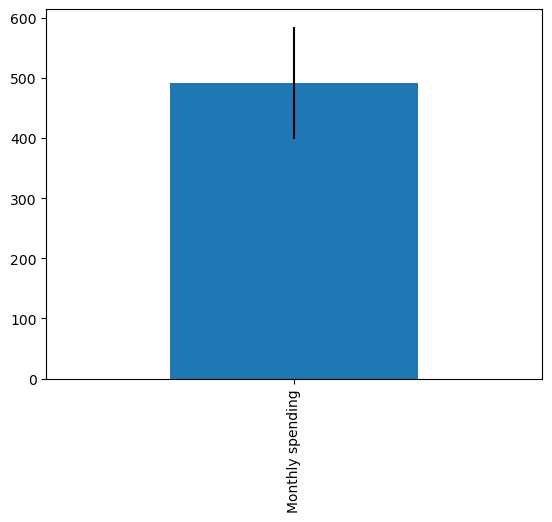

In [95]:
# E = t * sigma / sqrt(n)
# -> t = t_value
# -> sigma = standard deviation
# -> n = sample size

# Student's t-distribution because n < 30-40 (n = 31)
# 95% confidence interval
# -> p-value = 0,05
# -> d.f = n - 1 = 30
# -> t_value = t = 2.043 

# Using scipy library
google_alpha = 0.05
google_t_value = t.ppf(1-google_alpha/2, google_n-1)

google_E = google_t_value * google_sigma / np.sqrt(google_n)

google_min_ci = google_mean - google_E
google_max_ci = google_mean + google_E

print("Margin of error : {}".format(google_E))
print("Confidence intervalle (95%) : [{}, {}]".format(google_min_ci, google_max_ci))

# iloc to only use the column that we want to calculate the mean and confidence interval
google_df.mean().plot(yerr=google_E, kind="bar")

<Axes: >

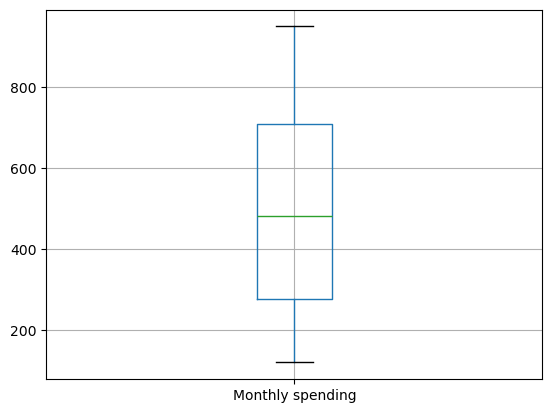

In [56]:
google_df.boxplot()

# Nitendo

In [97]:
nitendo_df = pd.read_excel(data_path + "Number of switch sold.xlsx")
nitendo_df.head()

,City,Number of sales
0,New York,65538.794054
1,San Francisco,45709.289870
2,Seattle,87417.957092
3,Denver,96461.186529
4,Austin,3665.528408


In [101]:
nitendo_mean = nitendo_df["Number of sales"].mean()
nitendo_sigma = nitendo_df["Number of sales"].std()
nitendo_n = len(nitendo_df)

print("Mean : {} | Standard Deviation : {} | Sample Size : {}".format(nitendo_mean, nitendo_sigma, nitendo_n))

Mean : 42996.94036175361 | Standard Deviation : 28365.335356619857 | Sample Size : 20


In [105]:
# Set t value
nitendo_t_value = 1.96

# We forced the margin of error to 5000
nitendo_E = 5000

# Get minimum sample size needed for a margin of error of 5000
nitendo_min_n = np.power(nitendo_t_value * nitendo_sigma / nitendo_E, 2)

print("Minimum sample size for a margin of error (E) of 5000 : {}".format(nitendo_min_n))

Minimum sample size for a margin of error (E) of 5000 : 123.6368634876361


# Apple

In [73]:
apple_df = pd.read_excel(data_path + "satisfaction apple release.xlsx")
apple_df.head()

,Satisfied customer
0,0
1,0
2,0
3,0
4,0


In [74]:
apple_n = len(apple_df)

print("Sample Size : {}".format(apple_n))

apple_satisfied = apple_df["Satisfied customer"].value_counts()[1]
apple_unsatisfied = apple_df["Satisfied customer"].value_counts()[0]

apple_satisfied_proportion = apple_satisfied / apple_n
apple_unsatisfied_proportion = apple_unsatisfied / apple_n

print("Number of people satisfied : {} ({} %)".format(apple_satisfied, apple_satisfied_proportion*100))
print("Number of people unsatisfied : {} ({} %)".format(apple_unsatisfied, apple_unsatisfied_proportion*100))



Sample Size : 41
Number of people satisfied : 15 (36.58536585365854 %)
Number of people unsatisfied : 26 (63.41463414634146 %)


In [ ]:
# E = z * sqrt((p * (1 - p)) / n)
# -> z = z_value
# -> p = proportion observate
# -> n = sample size

# Student's t-distribution because n > 30-40 (n = 41)
# 95% confidence interval
# -> p-value = 0,05
# -> z_value = z = 1.96
#  
# Using scipy library
apple_alpha = 0.05
apple_z_value = norm.ppf(1 - apple_alpha / 2)

apple_E = apple_z_value * np.sqrt((apple_satisfied_proportion * (1 - apple_satisfied_proportion)) / apple_n )

apple_min_ci = apple_satisfied_proportion - apple_E
apple_max_ci = apple_satisfied_proportion + apple_E

print("Margin of error : {}".format(apple_E))
print("Confidence intervalle (95%) : [{}, {}]".format(apple_min_ci, apple_max_ci))

1.959963984540054
Margin of error : 0.14743636313719835
Confidence intervalle (95%) : [0.218417295399387, 0.5132900216737837]


# Laboratory

In [ ]:
# Margin of error : E = z * sqrt((p * (1 - p)) / n)
# -> z = 1.96
# -> p = 0.90
# -> n = ?

n = sp.symbols("n", real = True)

expr = sp.Eq(0.01, (1.96 * sp.sqrt((0.90 * (1 - 0.90)) / n)))

res = sp.solve(expr)

print(res)

[3457.44000000000]
